In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import pow

## Question 2

In [36]:
def uniformRandomMatrix(n):
    return np.random.uniform(low=-1.0, high=1.0, size=(n,n))

mean = 2.0
variance = 5.0

def normalRandomMatrix(n):
    return np.random.normal(mean, variance, size=(n,n))

## Question 3

In [3]:
def GEPP(A):
    m, n = A.shape
    for i in range(m-1):
        # find best row (pivoting step)
        max_index = np.absolute(A[i:, i]).argmax() + i
        A[[i, max_index]] = A[[max_index, i]]
        # Gaussian elimination step
        for t in range(i+1, m):
            factor = - A[t][i] / A[i][i]
            A[t, i:] += (factor * A[i, i:])
    return A



#### Tests for GEPP

In [34]:
# Test 1
A = np.array([[0.02, 0.01, 0, 0],
             [1, 2, 1, 0],
             [0,1,2,1],
             [0,0,100,200]])
Target = np.array([[1,2,1,0],
                   [0,1,2,1],
                  [0,0,100,200],
                  [0,0,0,-0.05]])
U = GEPP(A)
print(np.allclose(U, Target, rtol=0.000001))


# Test 2
A = np.array([[2,1,1],
             [4,3,3],
             [8,7,9]], dtype='float')
Target = np.array([[8,7,9],
                  [0, -3/4, -5/4],
                  [0,0,-2/3]], dtype='float')
U = GEPP(A)
print(np.allclose(U, Target, rtol=0.000001))


True
True


## Question 4

In [4]:
def growth_factor(A):
    max_A = np.absolute(A).max()
    U = GEPP(A)
    max_U = np.absolute(U).max()
    return max_U / max_A
    

In [24]:
def compute_average_gf(n_range, num_iterations, randomMatrix):
    data = []
    for n in n_range:
        sum_gf = 0.0
        for _ in range(num_iterations):
            A = randomMatrix(n)
            sum_gf += growth_factor(A)
        data.append(sum_gf / num_iterations)
    return np.array(data)
    

Fit the data to c*n**a with c = 0.6498059572954935 and a = 0.6308986987115381


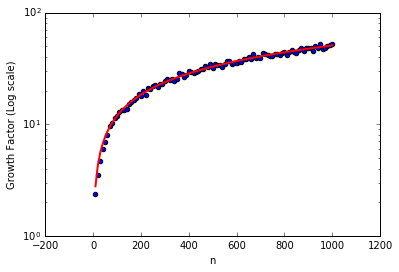

In [25]:
n_range = range(10, 1010, 10)
data = compute_average_gf(n_range, 20, uniformRandomMatrix)
exponential = lambda n, c, a: c * n**a
coefficients, _ = curve_fit(exponential, n_range, data)
c, a = coefficients
print("Fit the data to c*n**a with c = {} and a = {}".format(c, a))
plt.scatter(n_range, data, label='data')
plt.plot(n_range, exponential(n_range, c, a), label="exponential fit", color='r', linewidth='2.0')
plt.xlabel("n")
plt.ylabel("Growth Factor (Log scale)")
plt.yscale("log")
plt.legend()
plt.show()

The estimated function is $g(n) = 0.6498n^{0.630898}$, which grows much slower than the worst case $w(n) = 2^n$.  
In fact, for $n = 100$, $\frac{w(100)}{g(100)} \approx 10^{29}$, and for $n = 1000$, $\frac{w(1000)}{g(1000)} \approx 2*10^{299}$

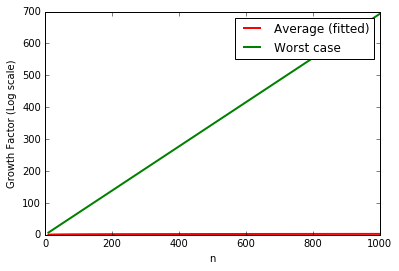

In [42]:
plt.plot(n_range, [np.log(c) + a*np.log(n) for n in n_range], color='r', linewidth=2.0, label='Average (fitted)')
plt.plot(n_range, [n*np.log(2) for n in n_range], color='g', linewidth=2.0, label='Worst case')
plt.xlabel('n')
plt.ylabel('Growth Factor (Log scale)')
plt.legend()
plt.show()

## Question 5

This graph shows how much faster the worst case grows compared to the average case.

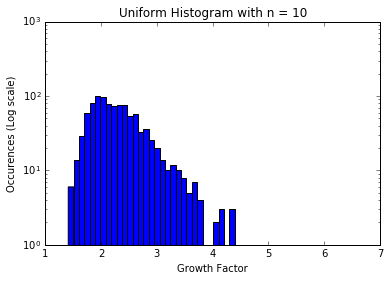

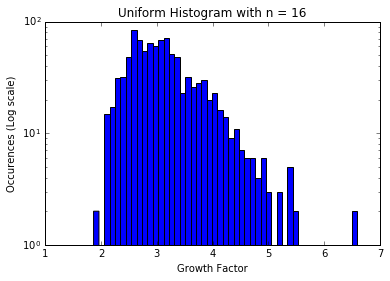

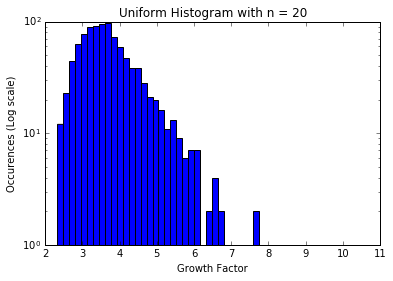

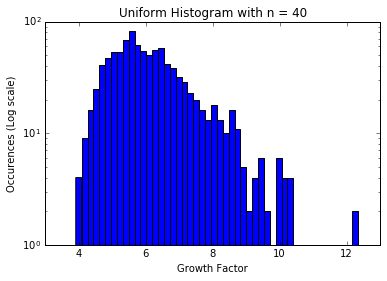

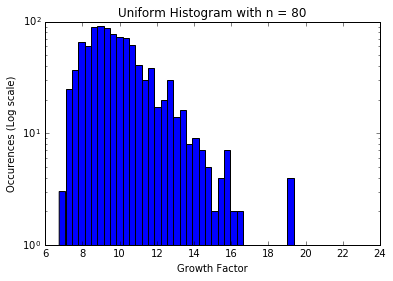

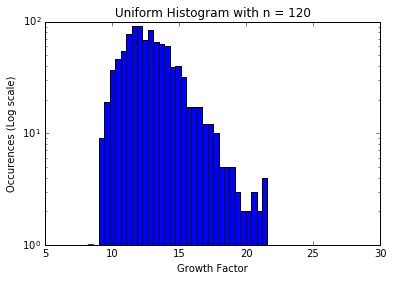

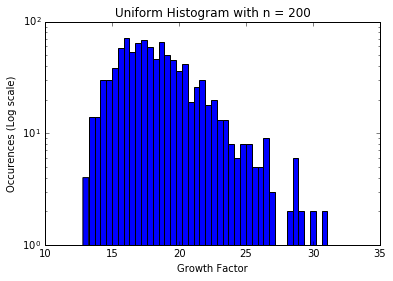

In [43]:
n_values = [10,16,20,40,80,120,200]
for n in n_values:
    data = []
    for _ in range(1000):
        A = uniformRandomMatrix(n)
        data.append(growth_factor(A))
    plt.hist(data, bins=50, log=True)
    plt.xlabel("Growth Factor")
    plt.ylabel("Occurences (Log scale)")
    plt.title("Uniform Histogram with n = {}".format(n))
    plt.show()

I ran the experiment for the following values of $n$: $[10,16,20,40,80,120,200]$.  
For each $n$, I computed the growth factor for $1000$ uniformly random matrices of size $n$. 
Dividing into 50 subintervals, we get the above result.

As $n$ increases, the wider the probability density gets more spread out. For $n = 10$, the majority of occurences happen between growth factors of $1.5$ and $2.5$. However, for $n = 200$, the majority of occurences happen between growth factors of $13$ and $20$. So, as $n$ increases, the probability density is spread out over more growth factor values.

Fit the data to c*n**a with c = 0.43264264066106356 and a = 0.5283771963626797


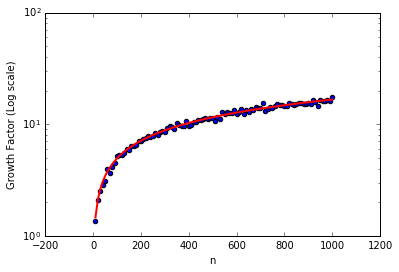

In [27]:
n_range = range(10, 1010, 10)
data = compute_average_gf(n_range, 20, normalRandomMatrix)
exponential = lambda n, c, a: c * n**a
coefficients, _ = curve_fit(exponential, n_range, data)
c, a = coefficients
print("Fit the data to c*n**a with c = {} and a = {}".format(c, a))
plt.scatter(n_range, data, label='data')
plt.plot(n_range, exponential(n_range, c, a), label="exponential fit", color='r', linewidth='2.0')
plt.xlabel("n")
plt.ylabel("Growth Factor (Log scale)")
plt.yscale("log")
plt.legend()
plt.show()

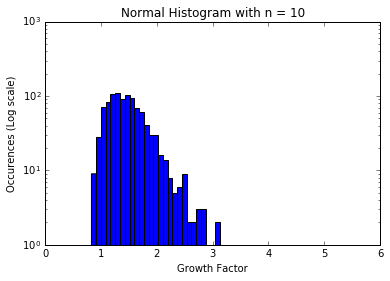

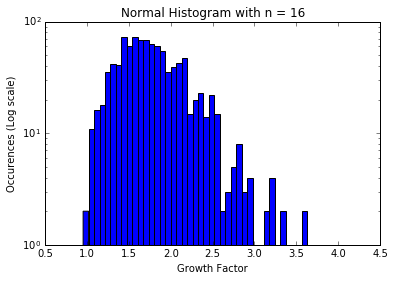

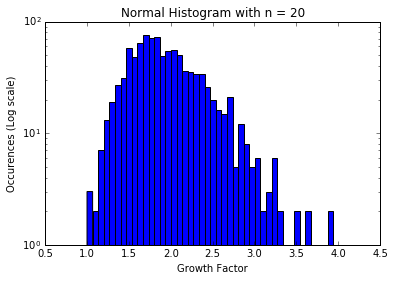

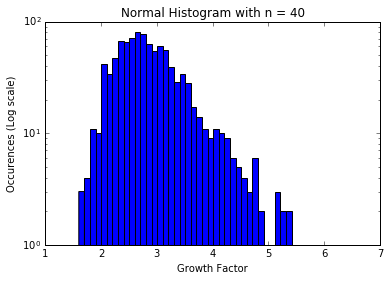

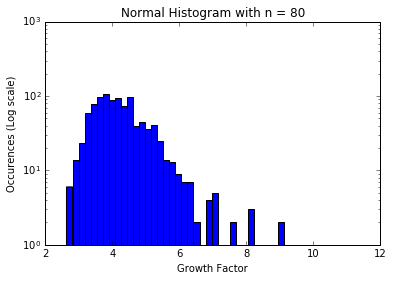

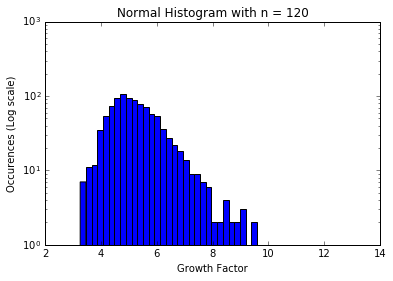

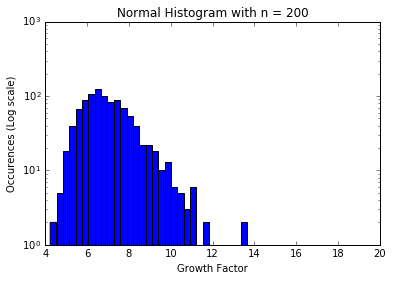

In [44]:
n_values = [10,16,20,40,80,120,200]
for n in n_values:
    data = []
    for _ in range(1000):
        A = normalRandomMatrix(n)
        data.append(growth_factor(A))
    plt.hist(data, bins=50, log=True)
    plt.xlabel("Growth Factor")
    plt.ylabel("Occurences (Log scale)")
    plt.title("Normal Histogram with n = {}".format(n))
    plt.show()

I ran the experiment for the following values of $n$: $[10,16,20,40,80,120,200]$.  
For each $n$, I computed the growth factor for $1000$ matrices whose elements are chosen from a normal distribution, of size $n$. 
Dividing into 50 subintervals, we get the above result.

With uniformly random matrices, the majority of the occurences are on an interval with a length of approximately 2.5. However, the center of said interval shifts to larger growth factors as $n$ increases.